<a href="https://colab.research.google.com/github/sera0911/asia-ai-study/blob/main/chart_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn
• Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지  
• 유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공  
• https://seaborn.github.io/  

In [114]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 임포트

# 한글 폰트 패스로 지정
import matplotlib.font_manager as fm
#plt.rc('font', family='Malgun Gothic')
#path = 'C:\Windows\Fonts\malgun.ttf'
#font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family='Malgun Gothic')

#%matplotlib inline # 자동 사이즈 조정

tips = sns.load_dataset('tips') #샘플 데이타프레임 로드
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

In [115]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen



####데이터의 형태에 따라 적합한 그래프의 종류
• Distribution Plot - 데이터의 분포를 시각화  
데이터의 평균(mean), 중위수(median), 범위(range), 분산(variance), 편차(deviation) 등을 이해  
Hist Plot, KDE Plot, ECDF Plot, Rug Plot  

• Categorical Plot - 범주형(categorical) 변수를 이해하는데 도움이 된다.  
일변량(univariate) 혹은 이변량(bivariate) 분석에 사용된다.  
Bar Plot, Count Plot, Box Plot, Violin Plot, Strip Plot, Swarm Plot  

• Matrix Plot - 시각화를 위해 2차원 행렬 데이터를 사용하는 특별한 유형의 plot  
매트릭스 데이터에서는 사이즈가 크기 때문에 패턴을 분석하고 생성하기 어렵다.  
Heat Map, Cluster Map  

• Multi-plot Grid - Grid plot은 시각화에 대한 제어력을 높이고 코드 한 줄로 다양한 그래프를 표시한다.  
Facet Grid, Joint Plot, Pair Plot  

• Regression Plot - regression 머신러닝의 결과를 그래프에 표기해준다.  
즉 데이터를 있는 그대로 보여주기보다는, 머신러닝 결과와 함께 표시한다  
Reg Plot, LM Plot  

Line Plot  
• sns.lineplot(x='컬럼명1', y='컬럼명2', data=데이타프레임명)  
• set_title(제목)  
• set_xlabel(X축 제목)   
• set_ylabel(Y축 제목)  

Text(0, 0.5, 'Total Bill')

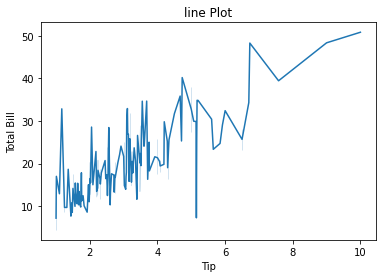

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots()
ax = sns.lineplot(x='tip', y='total_bill', data=tips)
ax.set_title('line Plot')
ax.set_xlabel('Tip')
ax.set_ylabel('Total Bill')

Hist Plot
• 변수에 대한 히스토그램을 표시  
• 하나 혹은 두 개의 변수 분포를 나타내는 전형적인 시각화 도구로 범위에 포함화는 관측수를 세어 표시  

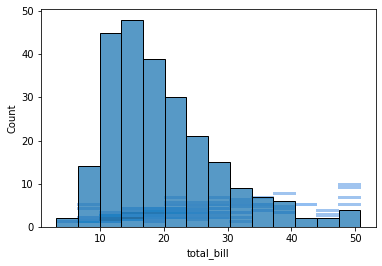

In [117]:
#total_bill 질량 분포
sns.histplot(x=tips['total_bill'])
#sns.displot(x=tips['total_bill'], kind='hist')

#total_bill 과 tip에 관한 질량 분포
sns.histplot(x=tips['total_bill'], y=tips['tip'])
# sns.displot(x=tips['total_bill'], y=df['tip'], kind='hist')

ECDF Plot  
• 누적 분포를 시각화해준다.  
• 실제 관측치의 비율을 시각화한다는 장점이 있다.

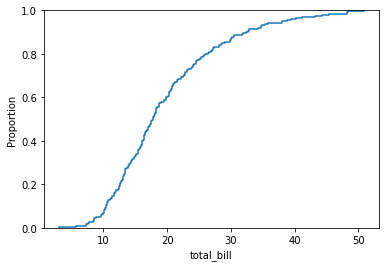

In [118]:
df = sns.load_dataset('tips')
sns.ecdfplot(x=df['total_bill'])
#sns.displot(x=df['total_bill'], kind='ecdf')

displot (히스토그램 + 밀집도 그래프)  

• 밀집도 그래프 - 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프  

• displot은 Distribution plot의 인터페이스로 적당한 plot 종류를 인자로 줌으로써 여러 가지 그래프를 시각화해준다.  

• Distribution Plot은 데이터의 분포를 시각화  

• 데이터의 평균(mean), 중위수(median), 범위(range), 분산(variance), 편차(deviation) 등을 이해할 수 있다.  

• sns.distplot( 데이타프레임명[컬럼명] )  

• sns.distplot( 데이타프레임명[컬럼명], kde=False) - 밀집도 그래프 제외, 히스토그램만 표시  

• sns.distplot( 데이타프레임명[컬럼명], hist=False) - 밀집도 그래프 표시, 히스토그램 제외

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram')

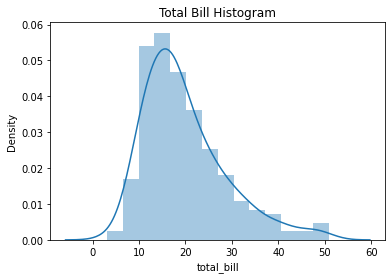

In [119]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])

# kde=False 히스토그램만 표시
# ax = sns.distplot(tips['total_bill'], kde=False)

# hist=False 그래프만 표시
# ax = sns.distplot(tips['total_bill'], hist=False)

ax.set_title('Total Bill Histogram')

산점도 Rug Plot  
• 데이터를 점으로 나타내면서 선형성을 함께 확인  

• x축과 y축을 따라 눈금을 그려서 주변 분포도를 표시한다.

• 개발 관측치에 대한 위치를 보여줌으로써 다른 그림들을 보완하는데 주로 쓰인다.

• sns.regplot(x='컬럼명1', y='컬럼명2', data=데이타프레임명, fit_reg=True/False)

• fit_reg= True/ False : 회귀선 표시 여부

Text(0, 0.5, 'tip')

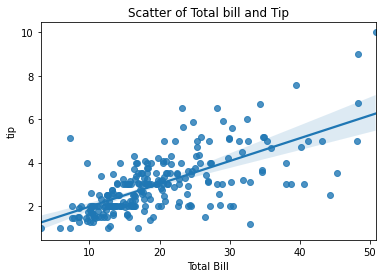

In [120]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
# ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg = False)

ax.set_title('Scatter of Total bill and Tip') # 제목지정
ax.set_xlabel('Total Bill')
ax.set_ylabel('tip')

Bar Plot  
• 이변량(bivariate) 분석을 위한 plot  
• x축에는 범주형 변수, y축에는 연속형 변수를 넣는다.

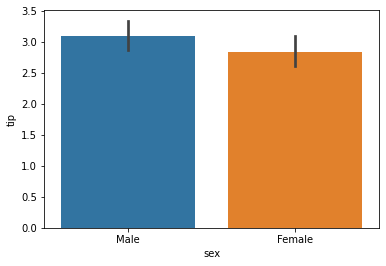

In [121]:
df = sns.load_dataset('tips')
sns.barplot(x = df['sex'], y = df['tip'])

kde : 이차원 밀집도 그래프  

• 하나 혹은 두 개의 변수우에 대한 분표를 그린다.

• histplot은 절대량이라면 kdeplot은 밀도 추정치를 시각화한다.

• 결과물로는 연속된 곡선의 그래프를 얻을 수 있다

• 등고선 형태로 밀집 정도를 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


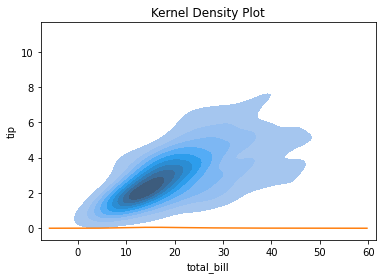

In [122]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
data2=tips['tip'],
shade=True) # shade=True
ax.set_title('Kernel Density Plot')

#단일 변수에 대한 질량 밀도(추정) 그래프
sns.kdeplot(x=df['total_bill'])
#sns.displot(x=df['total_bill'], kind='kde')

#두개의 변수에 대한 질량 밀도(추정) 그래프
#sns.kdeplot(x=df['total_bill'], y=df['tip'])
#sns.displot(x=df['total_bill'], y=df['tip'], kind='kde')

count Bar

• 특정 데이터값의 이산값을 나타낸 그래프

• 해당 카테고리 별 데이터(범주형)의 개수를 보여주는 그래프

• 일변량(univariate) 분석

• sns.countplot( 컬럼명, data=데이타프레임변수 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags

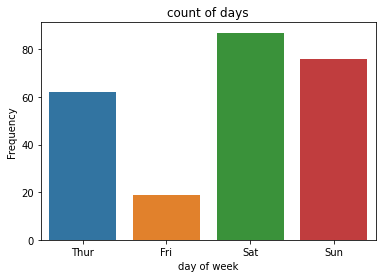

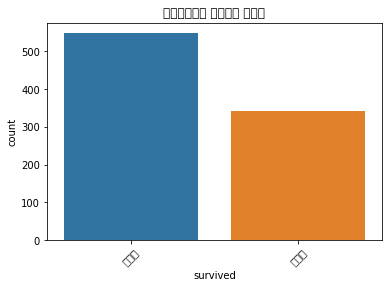

In [123]:
# tips 데이타프레임에서 요일별 데이타값을 막대그래프로 표시
tips['day'].unique() # 'day' 컬럼값 확인하기
ax = plt.subplots()
ax = sns.countplot('day', data=tips)

ax.set_title('count of days')
ax.set_xlabel('day of week')
ax.set_ylabel('Frequency')

#타이타닉호의 각 생존자, 사망자별 , 승객 수
ax = plt.subplots()
ax = sns.countplot(x="survived", data=titanic)
plt.title("타이타닉호의 생존자와 사망자")
ax.set_xticklabels(['생존자','사망자'], rotation=45 ) # 막대그래프 라벨
plt.show()

Boxplot

• 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치를 표시

• 특이치(outliar)를 발견하기에도 좋다.

• 단일 연속형 변수에 대해 수치를 표시하거나, 연속형 변수를 기반으로 서로 다른 범주현 변수를 분석 할 수 있다.

• sns.boxplot(x=컬럼명1, y=컬럼명2, data=데이타프레임)

Text(0, 0.5, 'total_bill')

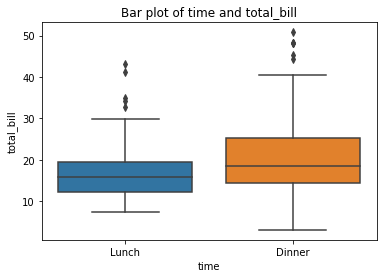

In [124]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of time and total_bill') # 제목지정
ax.set_xlabel('time') # X축 제목
ax.set_ylabel('total_bill') # Y축 제목

Violin Plot

• Box Plot과 비슷하지만 분포에 대한 보충 정보가 제공

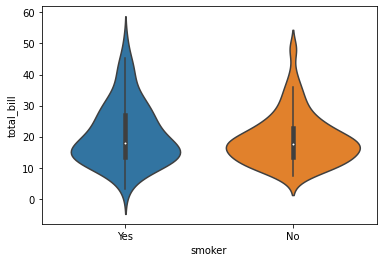

In [125]:
df = sns.load_dataset('tips')
df
sns.violinplot(y = df['total_bill'], x = df['smoker'])

Strip Plot

• 연속형 변수와 범주형 변수 사이의 그래프

• 산점도(scatter plot)로 표시되는데, 범주형 변수의 인코딩을 추가로 사용

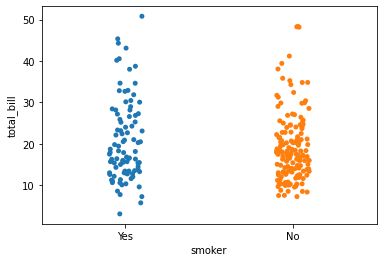

In [126]:
df = sns.load_dataset('tips')
df
sns.stripplot(y = df['total_bill'], x = df['smoker'])

Swarm Plot

• Strip plot과 violin plot의 조합

• 데이터 포인트 수와 함께 각 데이터의 분포도 제공

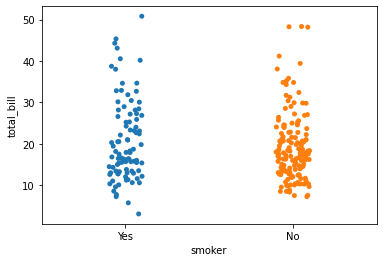

In [127]:
df = sns.load_dataset('tips')
df
sns.stripplot(y = df['total_bill'], x = df['smoker'])

pairplot

• 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.

• sns.pairplot(데이타프레임, hue=컬럼명, markers=마커리스트 )

• 수치에 해당하는 그래프를 전반적으로 그려줌

• 관계 그래프를 확인할 수 있음

• 전반적인 상태를 확인할 수 있어 처음 데이터를 확인 할 때 전체를 파악하기 좋음

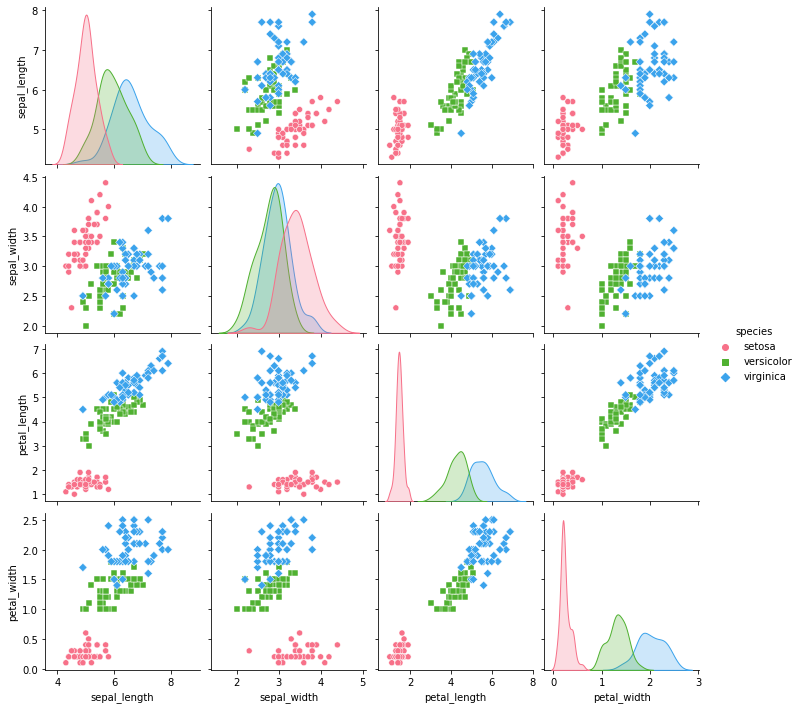

In [128]:
# Iris Pair Plot, Hue로 꽃의 종을 시각화
sns.pairplot(iris, hue="species", markers=["o", "s", "D"],
palette="husl")
plt.show()

heatmap

• 카테고리별 데이터 분류

• 데이터 간의 수치에 따라 색상을 입힘으로써 직관적인 통찰을 얻을 수 있다.

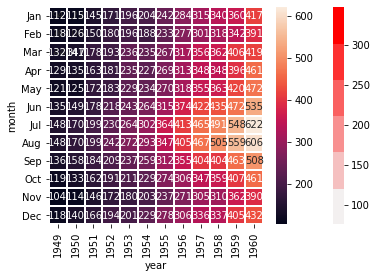

In [129]:
titanic_size = titanic.pivot_table(index='class'
,columns='sex' ,aggfunc='size')
# aggfunc='size' 각 데이터의 건수에 대해 출력
# 그냥 pivot table은 평균, 분산 등의 결과가 출력됨

titanic_size
sns.heatmap(titanic_size, annot=True, fmt='d', cmap=sns.light_palette('red'))
# annot=True : 숫자가 출력될 수 있게
# fmt='d' : 지수형태의 숫자가 아닌 지수형태의 숫자로 변경
# cmap=sns.light_palette('red') : 색상 결정

flights.head()
fp = flights.pivot('month','year','passengers')
# 열인덱스, 행인덱스, 데이터 순서로 들어감

sns.heatmap(fp, linewidths=1,annot=True, fmt='d')

heatmap

• 카테고리별 데이터 분류

• 데이터 간의 수치에 따라 색상을 입힘으로써 직관적인 통찰을 얻을 수 있다.

Cluster Map

• 행렬 데이터를 가지고 있고, 유사성에 따라 몇몇 특징들을 그룹화

• 유사도가 높은 것들 순서대로 계층적으로 클러스터(Hiearchical Clustering)가 형성된다.

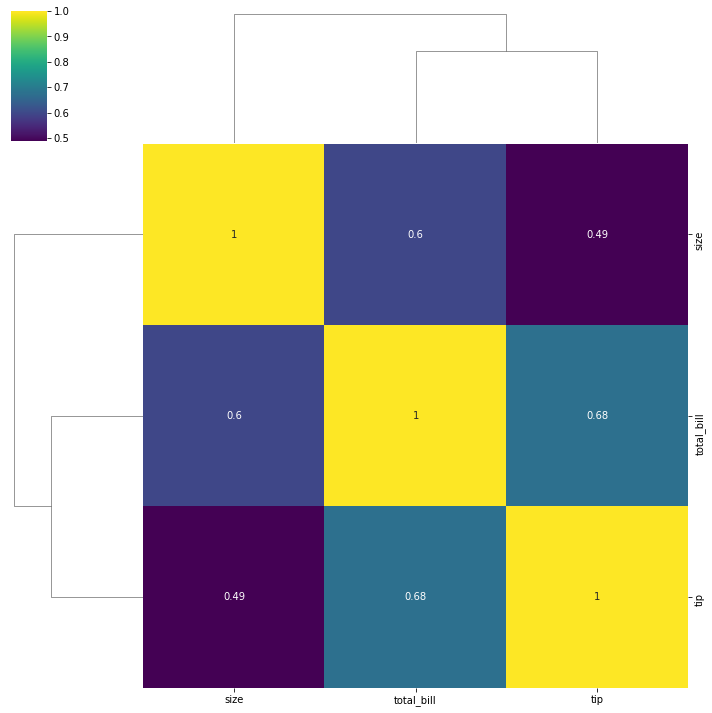

In [130]:
sns.clustermap(tips.corr(), annot=True, cmap='viridis')

Facet Grid

• 어떠한 조건에 따라 그래프를 각각 확인해보고 싶을 때 사용

• 성별과 흡연 여부에 따라서 얼마만큼 지불을 하는지 시각화로 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

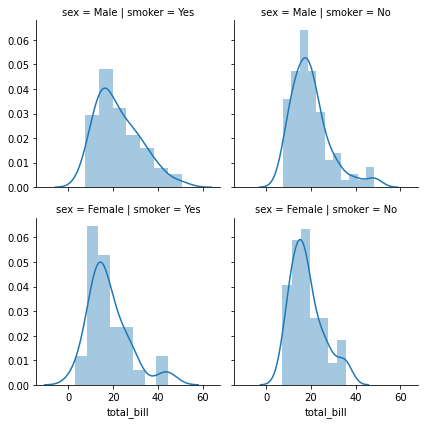

In [131]:
sns.FacetGrid(df, col = 'smoker', row = 'sex').map(sns.distplot, 'total_bill')

Jointplot

• 두 변수에 대한 displot의 조합이다.

• 두 변수에 분포에 대한 분석을 할 수 있다.

• 두 displot 사이에 scatter plot이 추가되어 분포를 추가로 확인할 수 있다.

• scatter plot 대신 hex plot으로 정의할 수도 있다.

• 안쪽은 점 데이터로 분포를 확인하고 바깥쪽은 막대그래프로 밀집도를 확인한다.

• 데이터의 경향을 파악하기 좋다.

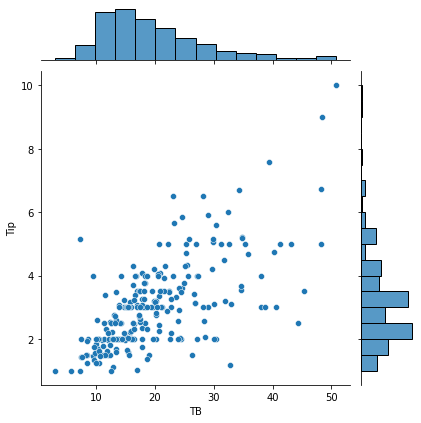

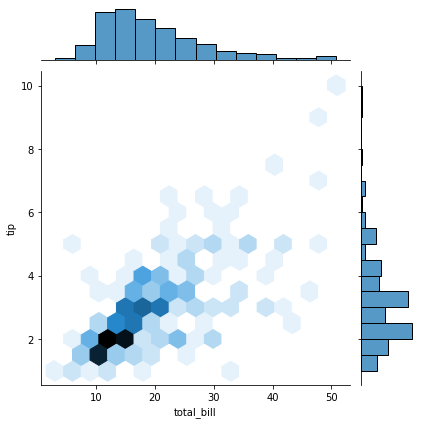

In [132]:
joint = sns.jointplot(x='total_bill',y='tip',data=tips)
# kind='hex' 옵션을 주면 6각 분포로 출력

joint.set_axis_labels(xlabel='TB',ylabel='Tip')
# jointplot에서는 regplot과 라벨 붙이는 방식이 다름
# set_axis_labels 함수를 사용해서 라벨 설정 가능
# 굳이 라벨을 설정하지 않아도 기본 column명으로 라벨 형성

sns.jointplot(x=tips['total_bill'], y=tips['tip'], kind = 'hex')

Reg Plot

• Regression 결과를 그래프로 보여준다.

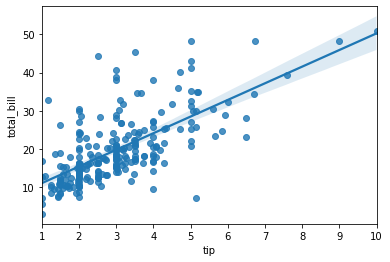

In [133]:
sns.regplot(x = 'tip', y = 'total_bill', data = df)

LM Plot

• regplot()과 faceGrid를 결합한 것

• hue에 들어간 컬럼의 값을 구분하여 따로따로 모델링하여 결과를 보여준다.

• regression을 위한 여러 가지 옵션들이 있다.

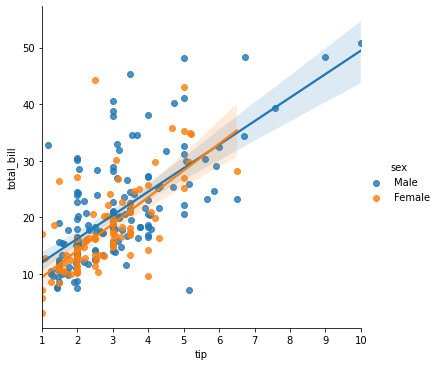

In [134]:
sns.lmplot(x = 'tip', y = 'total_bill', data = tips, hue = 'sex')

####wordcloud
KoNLPy  

• 한글 자연어 처리에 맞춤화된 파이썬 오픈소스 라이브러리

• 파이썬 한글 형태소 분석기

 KoNLPy 형태소 분석기 클래스

• Hannanum  
• Kkma  
• Komoran  
• Mecab  
• Okt(Twitter)  

In [135]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drive

In [136]:
!pip3 install konlpy wordcloud

In [137]:
 import jpype

p = jpype.getDefaultJVMPath()

jpype.startJVM( p )

OSError: ignored

In [138]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

! pip install WordCloud
! pip install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [146]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_281"


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drive

In [147]:
from konlpy.tag import Okt
okt = Okt()

okt.morphs     #형태소 분석
okt.nouns      #명사 분석
okt.phrases    #구(Phrase) 분석
okt.pos        #형태소 분석 태깅

#형태소 단위로 구문 분석
print( okt.morphs("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~") )

#명사만 추출
print(okt.nouns("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~"))

#어절만 추출
print(okt.phrases("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~"))

#형태소 단위로 쪼갠 후 각 품사들을 태깅해서 리스트 형태로 반환
#영어단어는 'Alpha'로 '^^'와 같은 기호?는 Puntuation, 'ㅋㅋㅋ'는 KoreanParticle로 분석
print(okt.pos("도움이 되셨다면, 좋아요 꾸욱 눌러주세요~"))

AttributeError: ignored

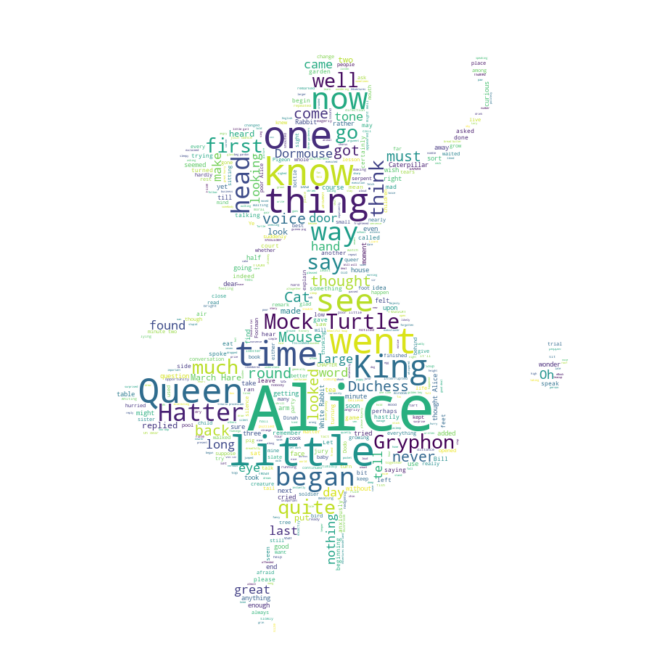

In [152]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_file = '/content/KakaoTalk_20210407_125215856.png'
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

mystopwords = set(STOPWORDS)
mystopwords.add('said')
mystopwords.update(['hahaha', 'hohoho'])

wc = WordCloud(background_color='white', max_words=2000, mask= alice_mask, stopwords=mystopwords)

stevefile = '/content/alice.txt'
myfile = open(stevefile, 'rt', encoding='utf-8')
text = myfile.read()

wc = wc.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
filename = 'graph02.png'
plt.savefig(filename)

In [ ]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('/content/news.txt', encoding='utf-8').read() 

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 
noun_adj_list = []

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='c:\Window\Fonts\malgun.ttf' ,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
# plt.to_file('test.jpg') 대신
plt.show()


####지도 데이터 시각화
지도 시각화

• 지도 시각화는 지도 위 위치를 기준으로 특정 지점에 데이터를 여러 요소로 표현한 것

• 데이터 값을 표현하는데 어떤 요소를 활용할지, 이를 크기(size)로 표현할지, 색(color)을 이용할 것인지

등 제작자가 선택한 방법에 따라 지도 시각화 유형이 결정

• 지도 시각화 제작 시 고려해야 할 점 중 하나는 '시각화 요소를 배치할 배경을 무엇으로 할 것인가'입
니다.

• 위치 데이터를 지도 시각화로 표현할 때, 어떤 형태의 지도가 데이터 인사이트를 도출하는데 도움이
될 것인지 판단하고 사용하는 것이 좋습니다.

지도 시각화 유형

• Dot Density Map - 지도 위에 데이터의 분포를 나타낸 것  
지도 위에 점(dot)이 많이 있는 지역과 그렇지 않은 지역을 시각적으로 빠르게 확인하여 인사이트를
도출

• Choropleth Map(혹은 Field Map) - 지리적 영역 범위별 수치 데이터 값을 색(color)으로 표현한 것  
가장 기본적인 형태는 하나의 계열 색을 활용하여 데이터 값을 표현하는 것으로, 이 경우 진한 색일수
록 수치 값이 크다

• Symbol Map(혹은 Bubble Map) - 지도의 특정 지점에 해당하는 수치 값을 심볼(symbol)의 크기로 나
타낸 것  

데이터의 분포뿐만 아니라 각 지점별 데이터의 크기를 시각적으로 확인  
색을 활용하여 각 심볼의 범주(category)를 표현할 수 수도 있다.  
원(circle)을 심볼로 한 경우가 가장 보편적  

• Connection Map과 Flow Map - 지역 간 이동 경로를 표현하는 지도 시각화 유형

• 지도 시각화의 가장 기본적인 한계 여러 시점의 데이터를 하나의 지도로 볼 수는 없다

=>해결방법 1 : 동일한 지역 범위의 지도를 여러 시점별로 나눠서 시각화 함으로서 시계열에 따른 데
이터의 변화를 한눈에 확인, 인사이트를 도출

• 지도 시각화의 가장 기본적인 한계 여러 시점의 데이터를 하나의 지도로 볼 수는 없다

=> 해결방법 2 : 애니메이션 효과를 활용

• 지도 시각화를 근거로 한 인사이트 도출, 데이터 해석에 오류가 있지는 않은지 검증 확인이 필요

•=> 예) Choropleth Map을 활용한 데이터 분석과 Cartogram을 활용한 데이터 분석



시각화 패키지 Folium

• 지도 시각화는 지도 위 위치를 기준으로 특정 지점에 데이터를 여러 요소로 표현한 것

• 데이터 값을 표현하는데 어떤 요소를 활용할지, 이를 크기(size)로 표현할지, 색(color)을 이용할 것인지 등 제작자가 선택한 방법에 따라 지도 시각화 유형이 결정

Choropleth Map

• 등치지도는 분할 된 지리적 영역 또는 색상, 음영 또는 패턴이있는 영역을 표시합니다.

Point 단위 Circle 레이어

• 지도에 각 포인트 단위로 원을 표현

• 시각화 하는 데이터가 너무 많으면, 브라우저에 따라 쥬피터에 렌더링이 되지 않습니다.

=> 방법1 : 데이터 일부만 샘플링해서 시각화  
=> 방법2 : .to_html() 을 사용 html 파일로 저장



In [179]:
from pandas import DataFrame
import folium

#예제 데이터 만들기

ex = {'경도' : [127.061026,127.047883,127.899220,128.980455,127.104071,127.102490,127.088387,126.809957,127.010861,126.836078
                ,127.014217,126.886859,127.031702,126.880898,127.028726,126.897710,126.910288,127.043189,127.071184,127.076812
                ,127.045022,126.982419,126.840285,127.115873,126.885320,127.078464,127.057100,127.020945,129.068324,129.059574
                ,126.927655,127.034302,129.106330,126.980242,126.945099,129.034599,127.054649,127.019556,127.053198,127.031005
                ,127.058560,127.078519,127.056141,129.034605,126.888485,129.070117,127.057746,126.929288,127.054163,129.060972],
      '위도' : [37.493922,37.505675,37.471711,35.159774,37.500249,37.515149,37.549245,37.562013,37.552153,37.538927,37.492388
              ,37.480390,37.588485,37.504067,37.608392,37.503693,37.579029,37.580073,37.552103,37.545461,37.580196,37.562274
              ,37.535419,37.527477,37.526139,37.648247,37.512939,37.517574,35.202902,35.144776,37.499229,35.150069,35.141176
              ,37.479403,37.512569,35.123196,37.546718,37.553668,37.488742,37.493653,37.498462,37.556602,37.544180,35.111532
              ,37.508058,35.085777,37.546103,37.483899,37.489299,35.143421],
      '구분' : ['음식','음식','음식','음식','생활서비스','음식','음식','음식','음식','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','소매','음식','음식','음식','음식','소매','음식','소매','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','음식','음식','소매','음식','음식','의료','음식','음식','음식','소매','음식','음식','음식','음식'
             ,'음식','음식','음식']}

ex=DataFrame(ex)

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = ex['위도'].mean()
long = ex['경도'].mean()

#지도 띄우기
m = folium.Map([lat,long], zoom_start=9)
#m

for i in ex.index:
  sub_lat = ex.loc[i, '위도']
  sub_long = ex.loc[i, '경도']
  
  title = ex.loc[i, '구분']

  #구분이 소매면 빨간색으로 표시, default는 녹색
    
  color = 'green'
  if ex.loc[i,'구분'] == '소매':
    color = "red"
        
    #지도에 동그라미로 데이터 찍기    
  folium.CircleMarker([sub_lat,sub_long],color=color,radius = 5, tooltip=title).add_to(m)
  """
  #지도에 데이터 찍어서 보여주기
  folium.WMarker([sub_lat, sub_long], tooltip= title).add_to(m)
  """
#한글이 안나오는 오류로 html로 trouble shooting
m.save('example.html')
m

   